In [4]:
from minisom import MiniSom
import numpy as np
import pandas as pd

data = pd.read_csv('dummy_data.csv')
# data normalization
data = data.values


# Initialization and training
som_shape = (1,5)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.296972147432766


In [5]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

     topic_0   topic_1   topic_2   topic_3   topic_4   topic_5   topic_6  \
0   0.464302  0.252910  0.085777  0.024034  0.169860  0.000000  0.000000   
1   0.079141  0.831240  0.076729  0.000000  0.000000  0.000000  0.000000   
2   0.067951  0.209116  0.067062  0.026110  0.015946  0.372548  0.141869   
3   0.378275  0.478271  0.035657  0.084242  0.020351  0.000000  0.000000   
4   0.076206  0.262915  0.656631  0.000000  0.000000  0.000000  0.000000   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.016829  0.048872  0.218865  0.204640  0.233516  0.257174  0.018526   
96  0.052042  0.561593  0.073722  0.252160  0.057366  0.000000  0.000000   
97  0.024767  0.080074  0.041630  0.062102  0.029113  0.301813  0.095464   
98  0.526999  0.254376  0.210155  0.000000  0.000000  0.000000  0.000000   
99  0.459086  0.459081  0.000000  0.000000  0.000000  0.000000  0.000000   

     topic_7   topic_8  topic_9  ...  topic_11  topic_12  topic_13  topic_14  \
0   0.0

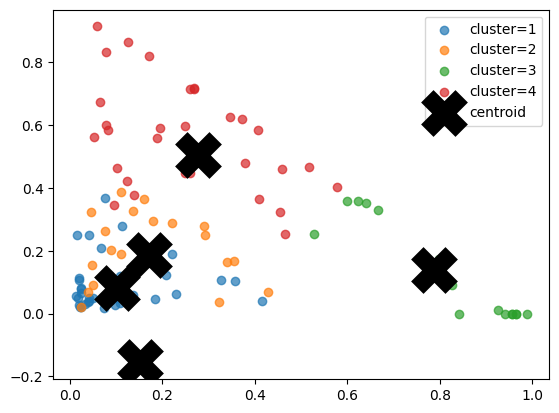

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

#display cluster assinment for each data point
data = pd.read_csv('dummy_data.csv')
data['cluster'] = cluster_index
print(data)